In [14]:
#importing required libraries
#for scientific computing
import numpy as np
#for high level data analysis
import pandas as pd
#for data visualization to gain insights
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#python's machine learning library
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [17]:
#Importing the irir dataset and performing data analysis
data = pd.read_csv('Iris.csv')
data.drop('Id',axis=1,inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
print(data['Species'].value_counts())
print('####################################')
print(data.info())
print('####################################')
X= data.drop('Species',axis=1)
y = data['Species']
X.head()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64
####################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
####################################


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


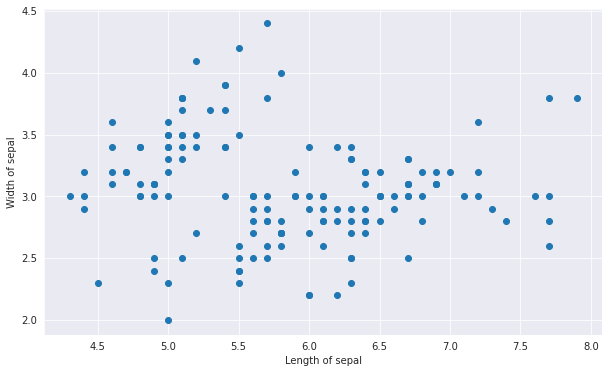

In [19]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.scatter(data=X,x='SepalLengthCm',y='SepalWidthCm')
plt.xlabel('Length of sepal')
plt.ylabel('Width of sepal');

In [20]:
X_scaled = preprocessing.scale(X)
X_scaled[:10]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

In [21]:
wcss = []
cl = 10
for i in range(1,cl):
    kmeans = KMeans(i)
    kmeans.fit(X_scaled)
    x = kmeans.inertia_
    wcss.append(x)
wcss

[600.0,
 223.73200573676345,
 140.96581663074699,
 114.64354810949803,
 91.09741935924282,
 80.18539211415842,
 71.97720733739256,
 62.967584883250325,
 54.679571941471664]

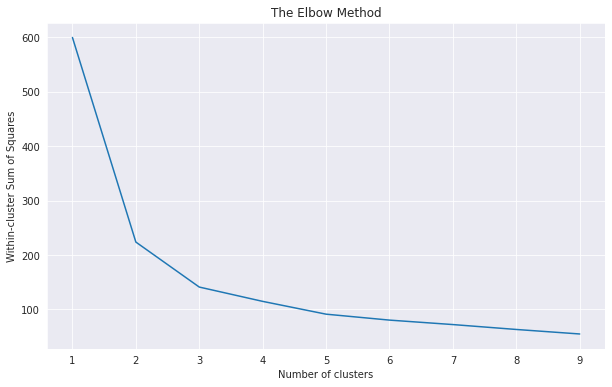

In [22]:
plt.figure(figsize=(10,6))
num_cl = range(1,cl)
plt.plot(num_cl,wcss);
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares');

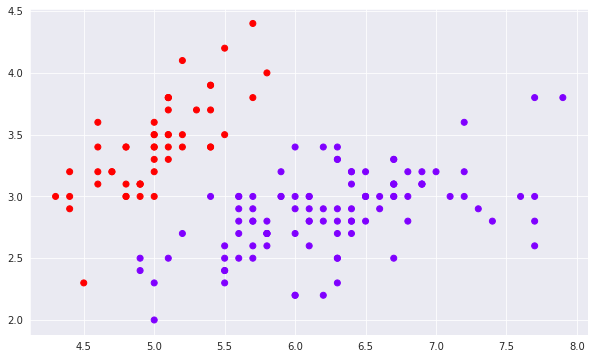

In [23]:
kmeans_2 = KMeans(2)
kmeans_2.fit(X_scaled)
cl_2 = X.copy()
cl_2['pred'] = kmeans_2.fit_predict(X_scaled)
plt.figure(figsize=(10,6))
plt.scatter(cl_2['SepalLengthCm'], cl_2['SepalWidthCm'], c= cl_2['pred'], cmap = 'rainbow');

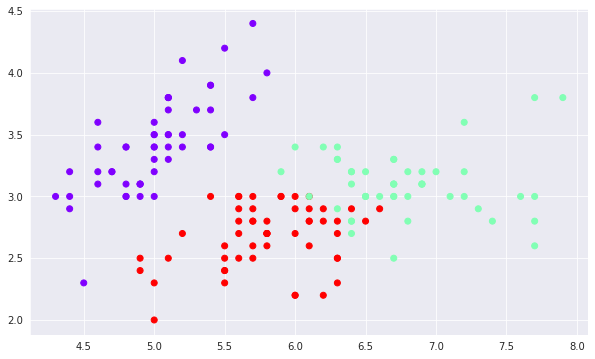

In [25]:
kmeans_3 = KMeans(3)
kmeans_3.fit(X_scaled)
cl_3 = X.copy()
cl_3['pred'] = kmeans_3.fit_predict(X_scaled)
plt.figure(figsize=(10,6))
plt.scatter(cl_3['SepalLengthCm'], cl_3['SepalWidthCm'], c= cl_3['pred'], cmap = 'rainbow');

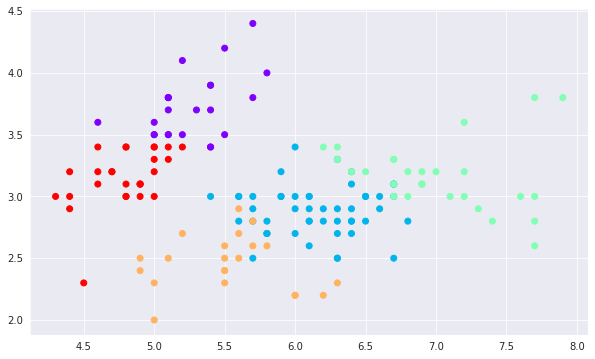

In [26]:
kmeans_5 = KMeans(5)
kmeans_5.fit(X_scaled)
cl_5 = X.copy()
cl_5['pred'] = kmeans_5.fit_predict(X_scaled)
plt.figure(figsize=(10,6))
plt.scatter(cl_5['SepalLengthCm'], cl_5['SepalWidthCm'], c= cl_5['pred'], cmap = 'rainbow');